Blood Transfusion Dataset

https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
bloodtrans = pd.read_csv('transfusion.csv', header=None)
bloodtrans.head()

,0,1,2,3,4
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Plotting each attribute on a histogram, excluding the target class (-1).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118a055c0>,
      dtype=object)

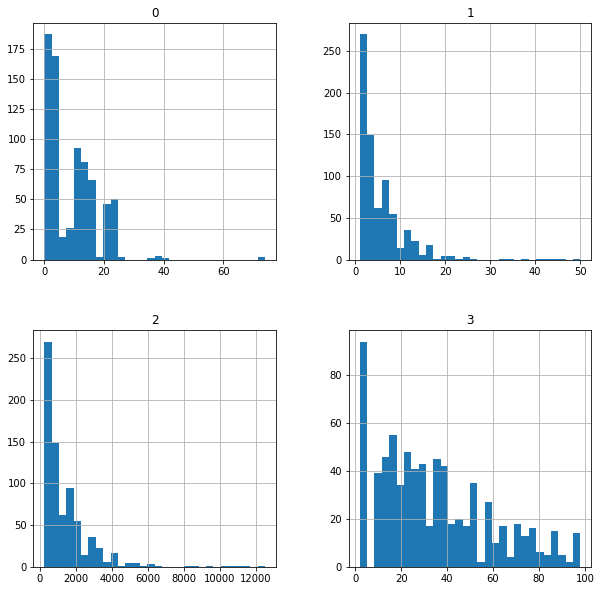

In [14]:
%matplotlib inline
bloodtrans.iloc[:, :-1].hist(bins=30, figsize=(10,10))

Splitting the data into 2 sets, attributes and target class. X = attributes, Y = target/labels.

In [34]:
X = bloodtrans.iloc[:,:-1]
Y = bloodtrans.iloc[:, -1]

X_array = bloodtrans.iloc[:, :-1].values
Y_array = bloodtrans.iloc[:, -1].values

Splitting X & Y into training/testing sets (80/20 split).

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array,
                                                   test_size=.2,
                                                   random_state=0)

Creating a correlation matrix of attribute correlation to 5th attribute, in this case our target, sorted by descending.

In [44]:
bloodtrans_corr = bloodtrans.corr()
bloodtrans_corr.iloc[:,4].sort_values(ascending=False)

4    1.000000
1    0.218633
2    0.218633
3   -0.035854
0   -0.279869
Name: 4, dtype: float64

Creating scatter plots of all attributes excluding target. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118fb9908>,
      dtype=object)

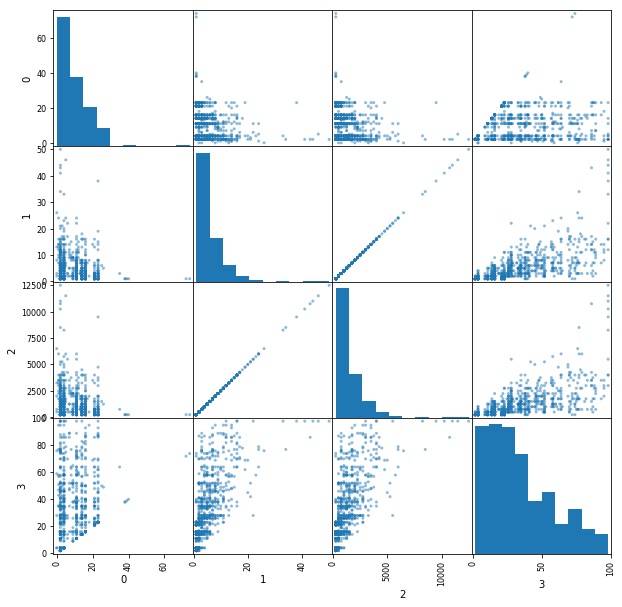

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(bloodtrans.iloc[:,:-1], figsize=(10,10))

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Model_knn = KNeighborsClassifier(n_neighbors=3)

Model_knn.fit(X_train, Y_train)

Model_knn.score(X_test, Y_test)

0.7533333333333333

In [24]:
from sklearn.linear_model import LogisticRegression
Model_reg = LogisticRegression()

Model_reg.fit(X_train, Y_train)

y_predict_reg=Model_reg.predict(X_test)

Model_reg.score(X_test, Y_test)

lin_mse = mean_squared_error(Y_test, y_predict_reg)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.5163977794943222

Measuring the RMSE may not be as useful when our target is binary. 

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

DTR_predict = tree_reg.predict(X_test)

tree_mse = mean_squared_error(Y_test, DTR_predict)

tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.5566016909118721

Above is a case of overfitting data. 

In [45]:
from sklearn.tree import DecisionTreeClassifier

Model_tree = DecisionTreeClassifier(criterion='entropy')

Model_tree.fit(X_train, Y_train)

Model_tree.score(X_test, Y_test)

0.7

In [47]:
from sklearn.ensemble import RandomForestClassifier

Model_RM = RandomForestClassifier(max_depth=2)

Model_RM.fit(X_train, Y_train)

Model_RM.score(X_test, Y_test)

0.7266666666666667